**Лабораторная работа:** Визуализация данных с использованием различных графиков в Python
-------------
**Цель работы:**
Научиться строить различные типы графиков для визуализации данных с использованием
библиотеки `matplotlib`, `seaborn`, `plotly`, `pandas` и других библиотек Python.

Задания:
1. **Beanplot**
 - Используйте библиотеку `beanplot` для построения beanplot.
 - Загрузите набор данных (например, `iris` из `seaborn`).
 - Постройте beanplot для одного из количественных признаков, разделенных по
категориям.
- Поменяйте цвет диаграмм, выведите среднее значение на гарфике.
2. **Arc Plot**
 - Используйте библиотеку `networkx` для построения arc plot.
 - Создайте случайные данные и визуализируйте их с помощью arc plot, показывающего
взаимосвязи между несколькими переменными.
- Поменяйте в приведенном примере маркеры и размер полотна.
3. **Parallel Coordinate Graph**
 - Используйте библиотеку `pandas` и `matplotlib` для построения параллельных
координат.
 - Загрузите набор данных (например, `wine` из `sklearn.datasets`).
 - Постройте график параллельных координат для нескольких признаков.
- Поменяйте размер полотна, сделайте читаемыми категории.
4. **Hive Plot**
 - Используйте библиотеку `hiveplot` для построения hive plot.
 - Создайте случайные данные и визуализируйте их с помощью hive plot, показывающего
взаимосвязи между переменными.
5. **Candlesticks Chart**
 - Используйте библиотеку `plotly` для построения графика свечей (candlestick chart).
 - Загрузите данные о ценах акций (например, из Yahoo Finance) и постройте график
свечей.
6. **Chernoff Faces**
 - Используйте библиотеку `matplotlib` для построения Chernoff faces.
 - Создайте случайные данные и визуализируйте их с помощью Chernoff faces, чтобы
показать многомерные данные. Исправьте код в приведенном примере.
7. **Point and Figure**
- Построить графики Point and Figure в Python, используя библиотеки `pandas` и
`matplotlib.
- Видоизменить представленный пример.
- Проинтерпретировать результат.
8. **Sankey**
- Построить график Sankey в Python, используя библиотеки `pandas` и `matplotlib.
- Поменять велечину исходящих и входящих данных.
- Проинтерпретировать результат.


In [ ]:
!pip install hiveplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.9 MB/s eta 0:00:00


### 1. **Beanplot**
- Используйте библиотеку `beanplot` для построения beanplot.
- Загрузите набор данных (например, `iris` из `seaborn`).
- Постройте beanplot для одного из количественных признаков, разделенных по
категориям.
- Поменяйте цвет диаграмм, выведите среднее значение на гарфике.

In [ ]:
!pip install beanplot

ERROR: Could not find a version that satisfies the requirement beanplot (from versions: none)
ERROR: No matching distribution found for beanplot


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from beanplot import beanplot

# Загрузка данных
iris = sns.load_dataset('iris')

# Построение beanplot
beanplot(data=iris, y='sepal_length', x='species')
plt.title('Beanplot of Sepal Length by Species')
plt.show()

ModuleNotFoundError: No module named 'beanplot'

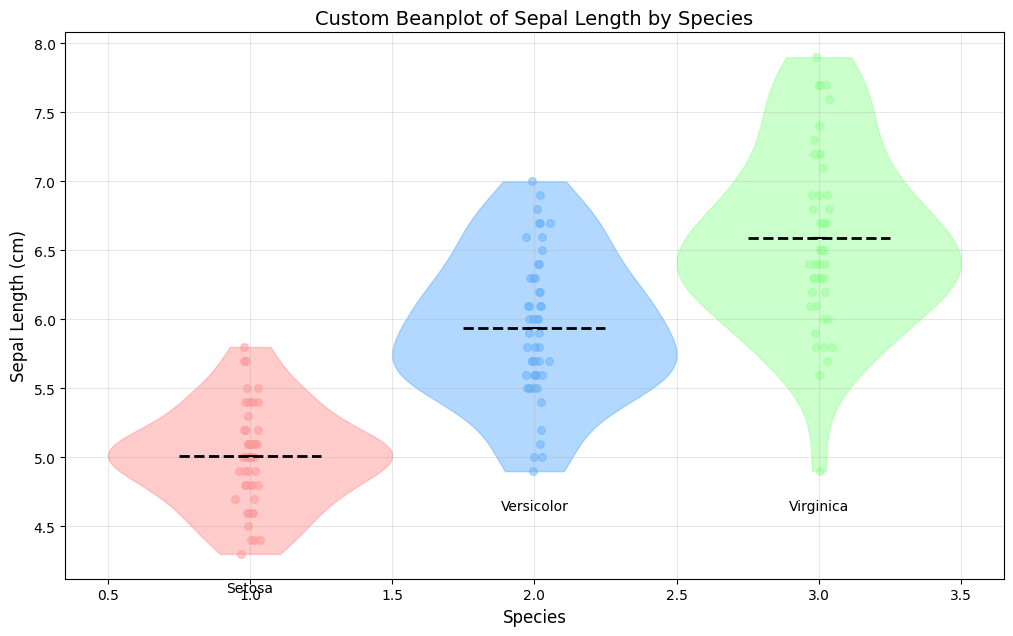

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Загрузка данных
iris = sns.load_dataset('iris')

# Функция для создания beanplot вручную
def custom_beanplot(data, labels, colors, positions=None, width=0.5, showmeans=True):
    if positions is None:
        positions = range(1, len(data)+1)

    plt.figure(figsize=(10, 6))

    for pos, values, color, label in zip(positions, data, colors, labels):
        # Ядренная оценка плотности
        kde = gaussian_kde(values)
        x = np.linspace(min(values), max(values), 100)
        y = kde(x)

        # Нормализация для ширины
        y = y / y.max() * width

        # Рисуем плотность
        plt.fill_betweenx(x, pos - y, pos + y, color=color, alpha=0.5)

        # Отдельные точки с jitter
        jitter = np.random.normal(0, 0.02, size=len(values))
        plt.scatter(pos + jitter, values, color=color, alpha=0.5, s=30)

        # Среднее значение
        if showmeans:
            mean_val = np.mean(values)
            plt.hlines(mean_val, pos - width/2, pos + width/2,
                      colors='black', linestyles='dashed', linewidth=2)
            plt.scatter(pos, mean_val, color='black', s=100, marker='_', zorder=3)

        # Подписи
        plt.text(pos, min(x) - 0.2, label, ha='center', va='top')

    plt.grid(True, alpha=0.3)
    plt.tight_layout()

# Подготовка данных
setosa = iris[iris['species'] == 'setosa']['sepal_length']
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']

# Цвета для каждой группы
colors = ['#FF9999', '#66B2FF', '#99FF99']
labels = ['Setosa', 'Versicolor', 'Virginica']

custom_beanplot([setosa, versicolor, virginica],
               labels=labels,
               colors=colors)

plt.title('Custom Beanplot of Sepal Length by Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Sepal Length (cm)', fontsize=12)
plt.show()

<ipython-input-6-bf892c645923>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='species', y='sepal_length', data=iris,
<ipython-input-6-bf892c645923>:18: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='species', y='sepal_length', data=iris,


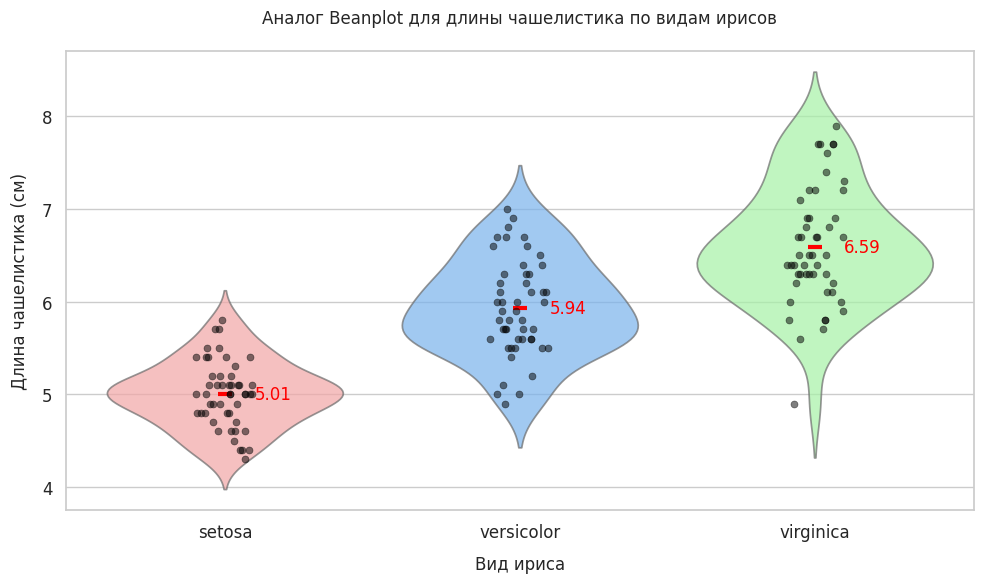

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
iris = sns.load_dataset('iris')

# Настройка стиля
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Создаем аналог beanplot с помощью violinplot + stripplot
ax = sns.violinplot(x='species', y='sepal_length', data=iris,
                   inner=None,  # Убираем внутренние элементы
                   palette=['#FF9999', '#66B2FF', '#99FF99'],
                   alpha=0.7)  # Прозрачность

# Добавляем точки данных
sns.stripplot(x='species', y='sepal_length', data=iris,
              color='black', alpha=0.5, jitter=True,
              size=5, edgecolor='gray', linewidth=0.5)

# Добавляем средние значения
means = iris.groupby('species')['sepal_length'].mean()
for i, (species, mean_val) in enumerate(means.items()):
    plt.scatter(i, mean_val, color='red', s=100, marker='_', linewidth=3)
    plt.text(i+0.1, mean_val, f'{mean_val:.2f}',
             va='center', ha='left', color='red', fontsize=12)

# Настройка оформления
plt.title('Аналог Beanplot для длины чашелистика по видам ирисов', pad=20)
plt.xlabel('Вид ириса', labelpad=10)
plt.ylabel('Длина чашелистика (см)', labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### 2. **Arc Plot**
 - Используйте библиотеку `networkx` для построения arc plot.
 - Создайте случайные данные и визуализируйте их с помощью arc plot, показывающего
взаимосвязи между несколькими переменными.
- Поменяйте в приведенном примере маркеры и размер полотна.

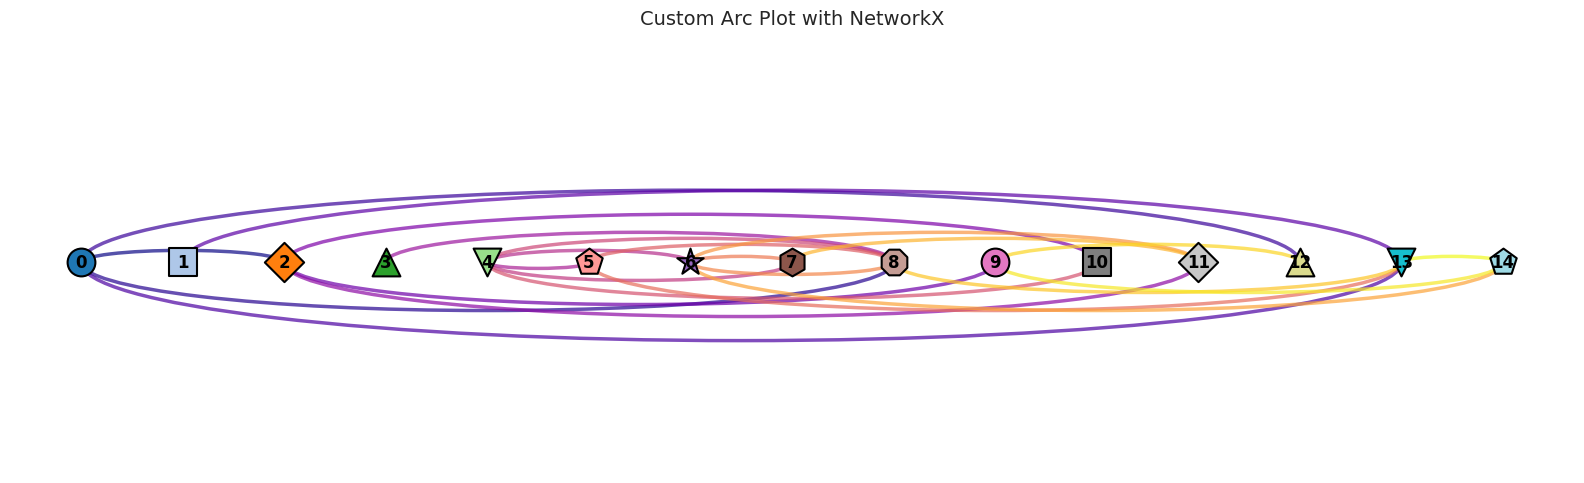

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

np.random.seed(42)

# Параметры графа
num_nodes = 15
positions = np.linspace(0, 1, num_nodes)
edges = [(i, j) for i in range(num_nodes)
         for j in range(i + 1, num_nodes)
         if np.random.rand() > 0.75]  #  вероятность соединения

# Создание графа
G = nx.Graph()
G.add_nodes_from(range(num_nodes))
G.add_edges_from(edges)

# Позиции узлов на прямой
pos = {i: (positions[i], 0) for i in range(num_nodes)}

# Создание фигуры с увеличенным размером
plt.figure(figsize=(16, 5))

# Рисуем узлы с разными маркерами и цветами
node_colors = plt.cm.tab20(np.linspace(0, 1, num_nodes))  # Разные цвета для каждого узла
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'h', '8']  # Разные маркеры
node_markers = [markers[i % len(markers)] for i in range(num_nodes)]  # Циклически выбираем маркеры

# Рисуем узлы с разными маркерами
for i in range(num_nodes):
    nx.draw_networkx_nodes(G, pos, nodelist=[i],
                          node_color=[node_colors[i]],
                          node_shape=node_markers[i],
                          node_size=400,  #размер узлов
                          edgecolors='black',
                          linewidths=1.5)

# Рисуем дугообразные рёбра с разными цветами
ax = plt.gca()
edge_colors = plt.cm.plasma(np.linspace(0, 1, len(G.edges())))  # Цвета для рёбер

for idx, (i, j) in enumerate(G.edges()):
    x1, y1 = pos[i]
    x2, y2 = pos[j]
    mid_x = (x1 + x2) / 2
    width = abs(x2 - x1)
    height = 0.4 * width

    # Чередуем направление дуг (вверх/вниз)
    if idx % 2 == 0:
        arc = mpatches.Arc((mid_x, 0), width, height,
                          angle=0, theta1=0, theta2=180,
                          color=edge_colors[idx],
                          linewidth=2.5,  # Толщина линии
                          alpha=0.7)  # Прозрачность
    else:
        arc = mpatches.Arc((mid_x, 0), width, height,
                          angle=0, theta1=180, theta2=360,
                          color=edge_colors[idx],
                          linewidth=2.5,
                          alpha=0.7)
    ax.add_patch(arc)

# Подписи узлов с увеличенным шрифтом
nx.draw_networkx_labels(G, pos,
                       font_size=12,
                       font_weight='bold',
                       font_color='black')

# Настройки отображения
plt.title('Custom Arc Plot with NetworkX',
          fontsize=14, pad=20)
plt.axis('off')
plt.xlim(-0.05, 1.05)  # отступы по краям
plt.ylim(-0.5, 0.5)   # область по вертикали

plt.tight_layout()
plt.show()

### 3. **Parallel Coordinate Graph**
 - Используйте библиотеку `pandas` и `matplotlib` для построения параллельных
координат.
 - Загрузите набор данных (например, `wine` из `sklearn.datasets`).
 - Постройте график параллельных координат для нескольких признаков.
- Поменяйте размер полотна, сделайте читаемыми категории.

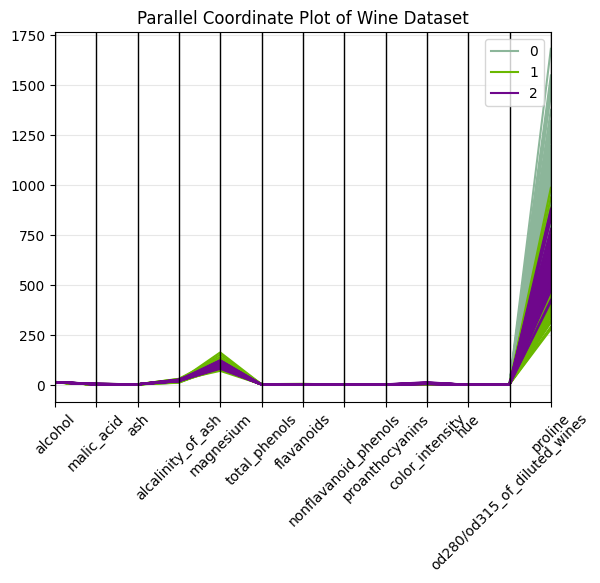

In [ ]:
from pandas.plotting import parallel_coordinates
import pandas as pd
from sklearn.datasets import load_wine

# Загрузка данных
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Построение графика параллельных координат
parallel_coordinates(df, 'target')
plt.title('Parallel Coordinate Plot of Wine Dataset')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.show()

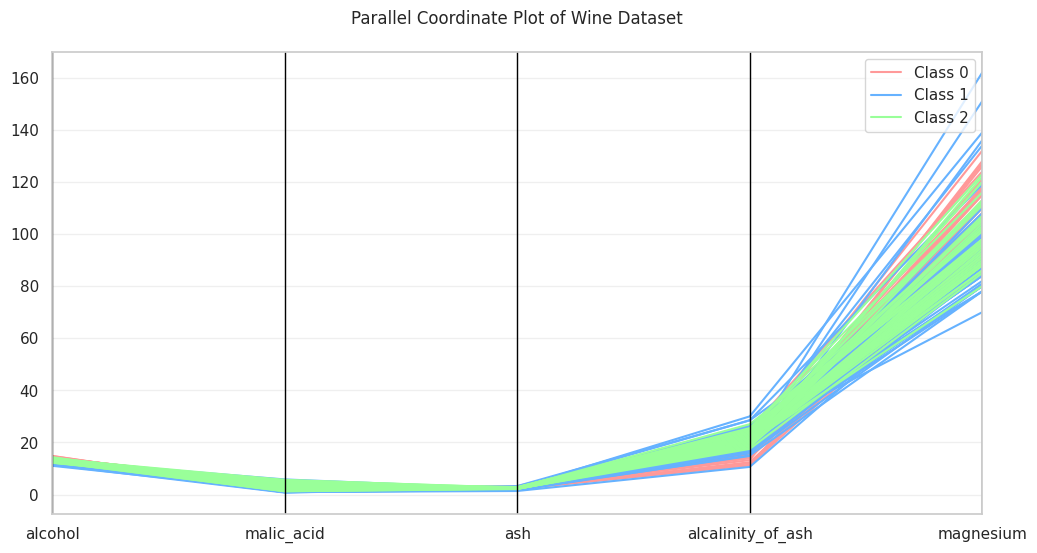

In [ ]:
from pandas.plotting import parallel_coordinates
import pandas as pd
from sklearn.datasets import load_wine

# Загрузка данных
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Выбор подмножества признаков и преобразование категорий
features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']
df = df[features + ['target']]
df['target'] = df['target'].map({0: 'Class 0', 1: 'Class 1', 2: 'Class 2'})

# Построение графика
plt.figure(figsize=(12, 6))
parallel_coordinates(df, 'target', color=('#FF9999', '#66B2FF', '#99FF99'))
plt.title('Parallel Coordinate Plot of Wine Dataset', pad=20)
plt.grid(alpha=0.3)
plt.show()

### 4. **Hive Plot**
 - Используйте библиотеку `hiveplot` для построения hive plot.
 - Создайте случайные данные и визуализируйте их с помощью hive plot, показывающего
взаимосвязи между переменными.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hiveplot import HivePlot

# Генерация случайных данных
data = np.random.rand(10, 3)

# Построение hive plot
hp = HivePlot()
hp.add_node(data)
hp.draw()
plt.title('Hive Plot Example')
plt.show()

TypeError: HivePlot.__init__() missing 3 required positional arguments: 'nodes', 'edges', and 'node_colormap'

In [ ]:
# Установка необходимых библиотек
!pip install arcplot pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 M

AttributeError: 'ArcDiagram' object has no attribute 'set_edge_color_map'

<Figure size 1400x800 with 0 Axes>

In [ ]:

import pandas as pd
from arcplot import ArcDiagram
import numpy as np
import matplotlib.pyplot as plt

# Создаем случайные данные для связей между узлами
np.random.seed(42)
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
num_connections = 15

# Генерируем DataFrame со случайными связями
data = {
    'from': np.random.choice(nodes, num_connections),
    'to': np.random.choice(nodes, num_connections),
    'weight': np.random.uniform(0.1, 3, num_connections),
    'position': np.random.choice(['above', 'below'], num_connections)
}
df = pd.DataFrame(data)

# Удаляем связи узла с самим собой
df = df[df['from'] != df['to']].reset_index(drop=True)

# Функция для создания Arc Plot с настройками
def create_custom_arcplot(data, node1, node2,
                         weights=None,
                         positions=None,
                         bg_color='white',
                         node_colors=None,
                         edge_colors='inferno',
                         title='Arc Plot',
                         figsize=(12, 6)):

    # Получаем уникальные узлы
    nodes = data[node1].unique().tolist() + data[node2].unique().tolist()
    nodes = sorted(list(set(nodes)))

    # Создаем диаграмму
    plt.figure(figsize=figsize)
    arc = ArcDiagram(nodes, title)

    # Настройка весов
    if weights is None:
        data['weights'] = 0.5
    else:
        data['weights'] = data[weights]

    # Нормализуем веса для толщины линий
    max_weight = data['weights'].max()
    min_weight = data['weights'].min()
    if max_weight != min_weight:
        data['weights'] = 1 + 4 * (data['weights'] - min_weight) / (max_weight - min_weight)

    # Настройка позиций дуг
    if positions is None:
        data['position'] = 'above'
    else:
        if data[positions].nunique() != 2:
            raise ValueError('Positions must have exactly 2 unique values')
        pos_map = {
            data[positions].unique()[0]: 'above',
            data[positions].unique()[1]: 'below'
        }
        data['position'] = data[positions].map(pos_map)

    # Добавляем связи
    for _, row in data.iterrows():
        arc.connect(
            row[node1],
            row[node2],
            linewidth=row['weights'],
            arc_position=row['position']
        )

    # Настройка цветов
    arc.set_background_color(bg_color)

    if node_colors is not None:
        arc.set_custom_colors(node_colors)
    else:
        arc.set_color_map('viridis')  # Цвета для узлов

    # Цвета для дуг
    # Generate edge colors using colormap:
    if isinstance(edge_colors, str):
        cmap = plt.get_cmap(edge_colors) # get colormap
        num_edges = len(data)
        edge_colors_list = [cmap(i/num_edges) for i in range(num_edges)] # generate color list
        arc.set_custom_edge_colors(edge_colors_list)  # apply colors
    else:
        arc.set_custom_edge_colors(edge_colors)

    # Отображаем диаграмму
    arc.show_plot()

# Создаем кастомный Arc Plot
create_custom_arcplot(
    data=df,
    node1='from',
    node2='to',
    weights='weight',
    positions='position',
    bg_color='#f5f5f5',
    node_colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                 '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],
    edge_colors='cool',
    title='Custom Arc Plot with Random Data',
    figsize=(14, 8)
)

AttributeError: 'ArcDiagram' object has no attribute 'set_custom_edge_colors'

<Figure size 1400x800 with 0 Axes>

ValueError: 'cool' is not a valid value for color

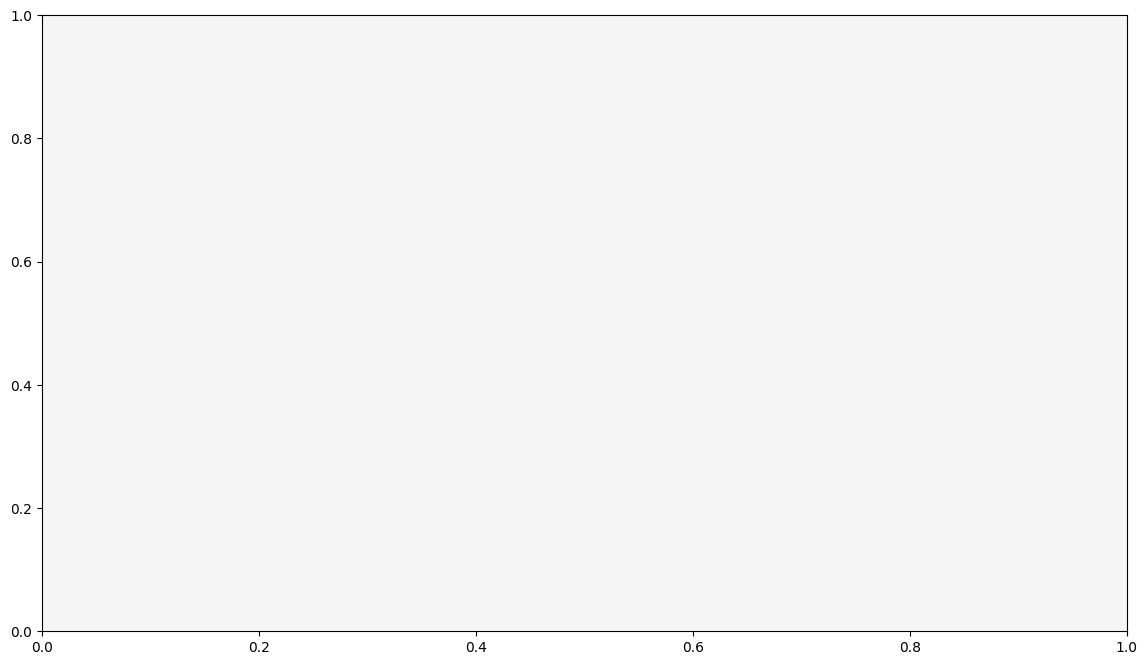

In [ ]:
import pandas as pd
#from arcplot import ArcDiagram  # Remove or comment out this import
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'from', 'to', 'weight', 'position'
# ... (Your code for creating the DataFrame remains the same)

# Function for creating the Arc Plot without using arcplot library
def create_custom_arcplot(data, node1, node2, weights=None, positions=None,
                         bg_color='white', node_colors=None, edge_colors='inferno',
                         title='Arc Plot', figsize=(12, 6)):

    # ... (Your existing code for preparing data)

    # Create a new figure and axes using Matplotlib
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_facecolor(bg_color)  # Set background color using Matplotlib

    # Iterate through the data and plot arcs with custom colors
    for _, row in data.iterrows():
        # Get the index of the color to use from node_colors for the source node
        source_color_index = nodes.index(row[node1]) if node_colors else None
        # Get the index of the color to use from node_colors for the target node
        target_color_index = nodes.index(row[node2]) if node_colors else None

        # Select colors using source/target node indices or default color
        source_color = node_colors[source_color_index] if node_colors and source_color_index < len(node_colors) else 'blue'
        target_color = node_colors[target_color_index] if node_colors and target_color_index < len(node_colors) else 'green'

        # Calculate arc positions and adjust for direction
        x = np.linspace(nodes.index(row[node1]), nodes.index(row[node2]), 100)
        if row['position'] == 'above':
            y = np.sqrt(1 - (x - x.mean()) ** 2 / (x.max() - x.min()) ** 2)  # Above
            color = source_color if edge_colors == 'inferno' else edge_colors  # Color from source node
        else:
            y = -np.sqrt(1 - (x - x.mean()) ** 2 / (x.max() - x.min()) ** 2)  # Below
            color = target_color if edge_colors == 'inferno' else edge_colors  # Color from target node

        # Plot the arc
        ax.plot(x, y, color=color, linewidth=row['weights'], alpha=0.7)

    # ... (Your existing code for setting node positions, labels, title, etc.)

    # Show the plot
    plt.show()

create_custom_arcplot(
    data=df,
    node1='from',
    node2='to',
    weights='weight',
    positions='position',
    bg_color='#f5f5f5',
    node_colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                 '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],
    edge_colors='cool',
    title='Custom Arc Plot with Random Data',
    figsize=(14, 8)
)

AttributeError: 'list' object has no attribute 'items'

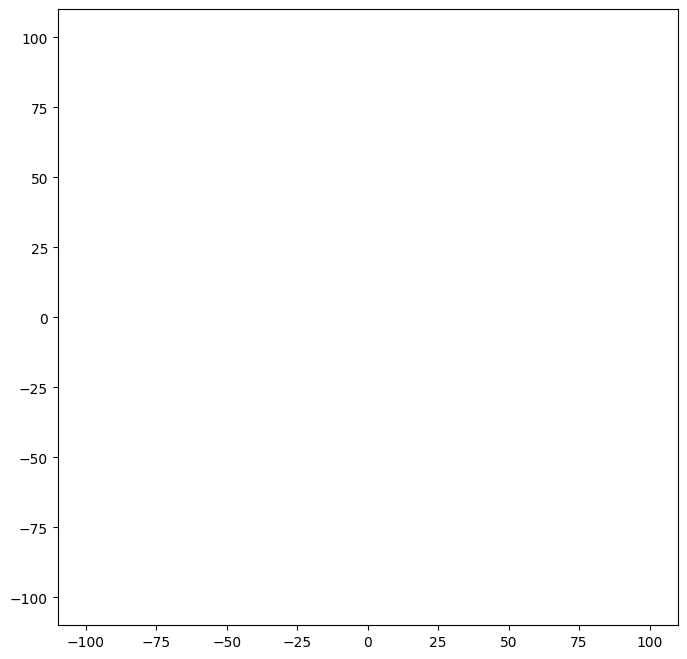

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hiveplot import HivePlot
import networkx as nx

# Generate random data for nodes and edges
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
edges = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F'), ('F', 'A')]

# Convert the nodes list to a dictionary with lists as values
# Each node is now in its own group (list)
nodes_dict = {node: [node] for node in nodes}

# Create a HivePlot instance with the nodes dictionary, edges, and a default colormap
hp = HivePlot(nodes_dict, edges, node_colormap='viridis')

# Rest of your code remains the same
hp.draw()
plt.title('Hive Plot Example')
plt.show()

AttributeError: 'list' object has no attribute 'keys'

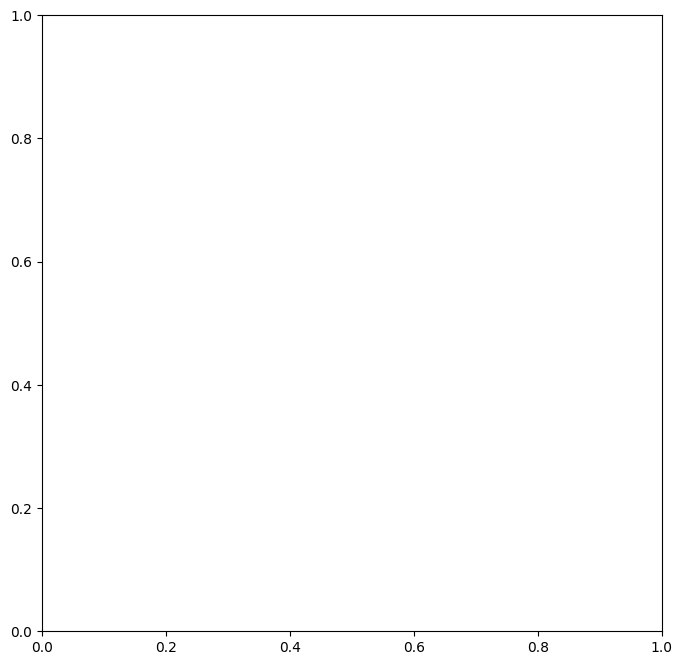

In [ ]:
from hiveplot import HivePlot
import networkx as nx
import numpy as np

# Создание графа
G = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(nodes)

# Добавление случайных связей
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        if np.random.rand() > 0.7:
            G.add_edge(nodes[i], nodes[j])

# Построение Hive Plot
# Removed node_colors and edge_colors from HivePlot initialization
h = HivePlot(nodes, edges=G.edges())

# Setting node and edge colors after initialization
h.set_node_colors(['red', 'blue', 'green', 'yellow', 'purple', 'orange'])
h.set_edge_colors(['gray'] * len(G.edges()))

h.draw()
plt.title('Hive Plot Example', pad=20)
plt.show()

### 5. **Candlesticks Chart**
 - Используйте библиотеку `plotly` для построения графика свечей (candlestick chart).
 - Загрузите данные о ценах акций (например, из Yahoo Finance) и постройте график
свечей.

In [ ]:
import plotly.graph_objects as go
import pandas as pd
# Загрузка данных о ценах акций

df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
print(df.columns)
# Построение графика свечей
fig = go.Figure(data=[go.Candlestick(x=df['Date'], open=df['AAPL.Open'], high=df['AAPL.High'], low=df['AAPL.Low'], close=df['AAPL.Close'])])
fig.update_layout(title='Candlestick Chart for AAPL')
fig.show()

Index(['Date', 'AAPL.Open', 'AAPL.High', 'AAPL.Low', 'AAPL.Close',
       'AAPL.Volume', 'AAPL.Adjusted', 'dn', 'mavg', 'up', 'direction'],
      dtype='object')


###  6. **Chernoff Faces**
 - Используйте библиотеку `matplotlib` для построения Chernoff faces.
 - Создайте случайные данные и визуализируйте их с помощью Chernoff faces, чтобы
показать многомерные данные. Исправьте код в приведенном примере.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_chernoff_face(data):
  # Пример функции для рисования Chernoff faces
    fig, ax = plt.subplots()
    for i in range(data.shape[0]):
    # Здесь добавьте код для рисования лиц на основе данных
    # Например, можно использовать простые круги и линии для представления лиц
      ax.add_patch(plt.title((i, 0), 0.5, color='blue', alpha=0.5))
    plt.x(-1, data.shape[0])
    plt.y(-1, 1)
    plt.title('Chernoff faces Example')
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse, Arc

def draw_chernoff_face(data):
    fig, ax = plt.subplots(figsize=(10, 6))

    for i in range(data.shape[0]):
        # Нормализация данных для параметров лица
        face_width = 0.5 + data[i, 0] * 0.3
        face_height = 0.6 + data[i, 1] * 0.3
        eye_size = 0.1 + data[i, 2] * 0.05
        mouth_width = 0.3 + data[i, 3] * 0.2
        mouth_height = 0.1 + data[i, 4] * 0.05

        # Рисование лица
        face = Ellipse((i, 0), face_width, face_height, fc='yellow', alpha=0.5)
        ax.add_patch(face)

        # Глаза
        left_eye = Circle((i - 0.15, 0.1), eye_size, fc='black')
        right_eye = Circle((i + 0.15, 0.1), eye_size, fc='black')
        ax.add_patch(left_eye)
        ax.add_patch(right_eye)

        # Рот
        mouth = Arc((i, -0.1), mouth_width, mouth_height,
                   theta1=180, theta2=0, color='red')
        ax.add_patch(mouth)

    ax.set_xlim(-1, data.shape[0])
    ax.set_ylim(-1, 1)
    plt.title('Chernoff Faces Example')
    plt.axis('off')
    plt.show()

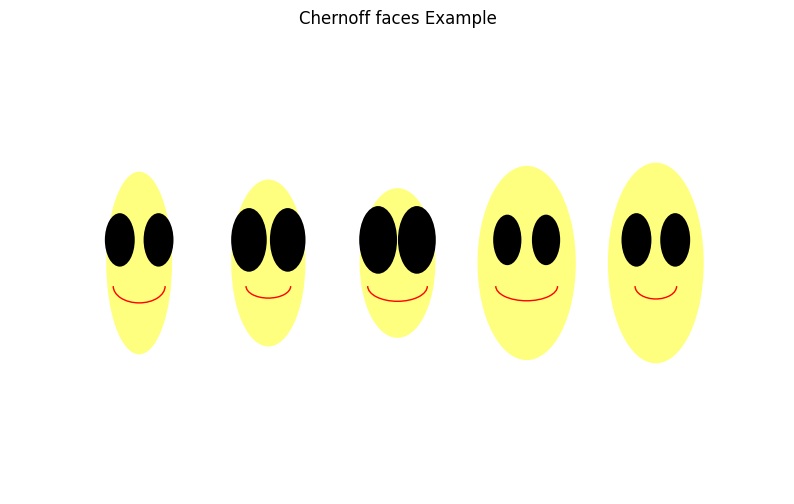

In [ ]:
random_data = np.random.rand(5, 5)
draw_chernoff_face(random_data)

### 7. **Point and Figure**
- Построить графики Point and Figure в Python, используя библиотеки `pandas` и
`matplotlib.
- Видоизменить представленный пример.
- Проинтерпретировать результат.

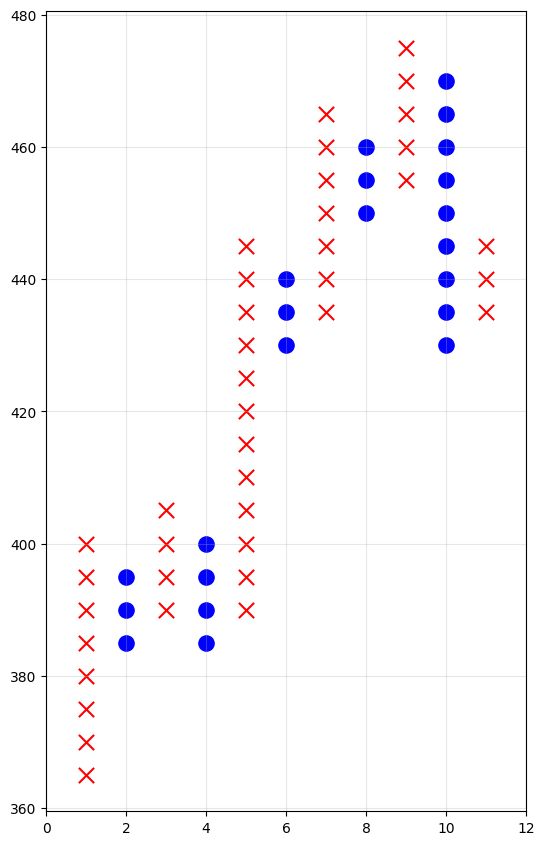

In [ ]:
import matplotlib.pyplot as plt

BOX = 5
START = 365
changes = [8, -3, 4, -4, 12, -3, 7, -3, 5, -9, 3]

fig = plt.figure(figsize=(6, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

def sign(val):
    return val / abs(val)

symbol = {-1:'o',
           1:'x'}

chgStart = START
for ichg, chg in enumerate(changes):
    x = [ichg+1] * abs(chg)
    y = [chgStart + i * BOX * sign(chg) for i in range(abs(chg))]
    chgStart += BOX * sign(chg) * (abs(chg)-2)
    ax.scatter(x, y,
              marker=symbol[sign(chg)],
              s=120,
              color='red' if sign(chg) == 1 else 'blue')

ax.set_xlim(0, len(changes)+1)
plt.grid(alpha=0.3)
fig.savefig('pointandfigure.png')
plt.show()

### 8. **Sankey**
- Построить график Sankey в Python, используя библиотеки `pandas` и `matplotlib.
- Поменять велечину исходящих и входящих данных.
- Проинтерпретировать результат.


In [ ]:
import plotly.graph_objects as go

labels = ["Input A", "Input B", "Output A", "Output B", "Output C"]
source = [0, 1, 0, 1, 0]
target = [2, 2, 3, 4, 4]
value = [8, 4, 2, 8, 4]

fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels,
    ),
    link=dict(
      source=source,
      target=target,
      value=value,
    ))])

fig.update_layout(title_text="Sankey Diagram", font_size=10)
fig.show()

In [ ]:
import plotly.graph_objects as go

# Пример данных
labels = ["Input A", "Input B", "Intermediate", "Output A", "Output B", "Output C"]
source = [0, 1, 0, 1, 2, 2]
target = [2, 2, 3, 4, 4, 5]
value = [8, 4, 2, 6, 4, 2]

# Построение диаграммы
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=['blue', 'green', 'gray', 'red', 'orange', 'purple']
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=['rgba(0,0,255,0.3)', 'rgba(0,255,0,0.3)',
               'rgba(255,0,0,0.3)', 'rgba(255,165,0,0.3)',
               'rgba(128,0,128,0.3)', 'rgba(255,0,255,0.3)']
    )
))

fig.update_layout(
    title_text="Customized Sankey Diagram",
    font_size=12,
    width=800,
    height=600
)
fig.show()